In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging
from shapely.geometry import Point
import numpy as np
from geopandas.tools import sjoin

In [ ]:
basin_shp = r''

In [2]:
shapefile_path = r'G:\fresh_start\paper\code_paper\arcgis\whole_nepal\Physiography\Physiography_Nepal.shp'
gdf_basin = gpd.read_file(shapefile_path)

In [4]:
print(gdf_basin.head())

       AREA  PERIMETER  PHYSIOGRA_  PHYSIOGRA1       DESCRIPTIO  AREA_SQKM  \
0  2.621160   26.50470           2           5    High Mountain  28315.695   
1  2.777240   35.98060           3           4  Middle Mountain  30169.969   
2  3.950470   21.69500           4           3             Hill  43140.850   
3  1.736210   19.28480           5           2          Siwalik  19015.184   
4  0.515452    6.25145           6           1            Tarai   5633.822   

   LUT  LUT1  LUT2  LUT3  LUT4  LUT5  \
0   82    82    82    82    82    56   
1   82    82    82    82   100    82   
2   82    82    82    70    82    82   
3   70    82    62    82    82    82   
4   82    83    82    82    82    82   

                                            geometry  
0  POLYGON ((81.09111 30.05471, 81.0915 30.05357,...  
1  POLYGON ((80.76803 30.05267, 80.76858 30.05196...  
2  POLYGON ((80.51539 29.82355, 80.51708 29.82066...  
3  POLYGON ((80.25878 29.17446, 80.27735 29.16973...  
4  POLYGON ((80

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5956\4088922334.py:20: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(title='Description')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5956\4088922334.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Description')


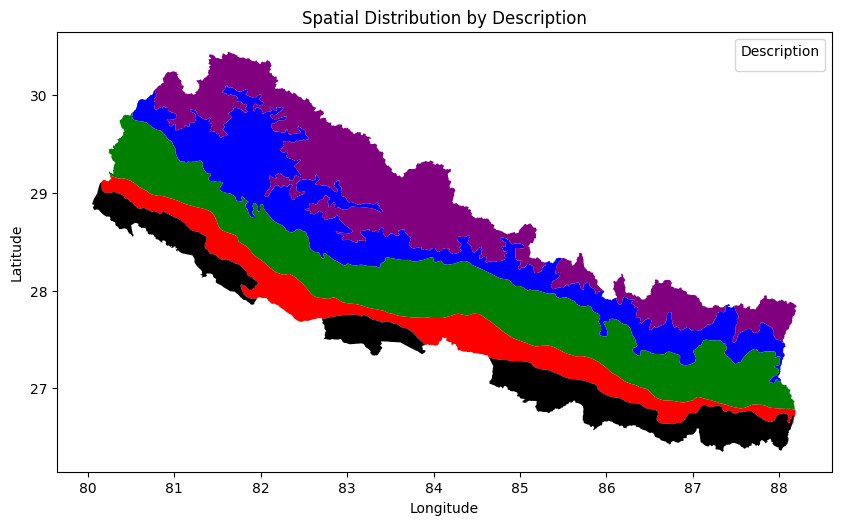

In [4]:
# Define a color map based on the unique values in 'DESCRIPTION'
color_map = {
    'Middle Mountain': 'blue',
    'Hill': 'green',
    'Siwalik': 'red',
    'High Mountain': 'purple',
    'Tarai': 'black',
}

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))


# Plot each unique DESCRIPTION with its corresponding color
for description, color in color_map.items():
    subset = gdf_basin[gdf_basin['DESCRIPTIO'] == description]
    subset.plot(ax=ax, color=color, label=description)

# Add legend and titles
plt.legend(title='Description')
plt.title('Spatial Distribution by Description')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()